<a href="https://colab.research.google.com/github/AguiarCamile/Trabalhos_IA/blob/main/Atividade_3_Sample_distribution_and_sampling_distribution%2C_TLC_and_p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 3 - Sample distribution and sampling distribution, TLC and p-value

Bibliotecas

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Parte A: sample distribution and sampling distribution

A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

In [ ]:
file_path = "/content/drive/MyDrive/IA/data.csv"
df = pd.read_csv(file_path)

Criando dados artificiais:

In [ ]:
tempo = df['tempo'].values

# média e do desvio padrão
media_real = np.mean(tempo)
desvio_real = np.std(tempo)
populacao = 1000

# Gerando dados artificiais baseados em distribuição normal
np.random.seed(1)  # para resultados reproduzíveis
tempo_artificial = np.random.normal(loc=media_real, scale=desvio_real, size=populacao)

mu = np.mean(tempo_artificial)
sigma = np.std(tempo_artificial)

Plotando o histograma:

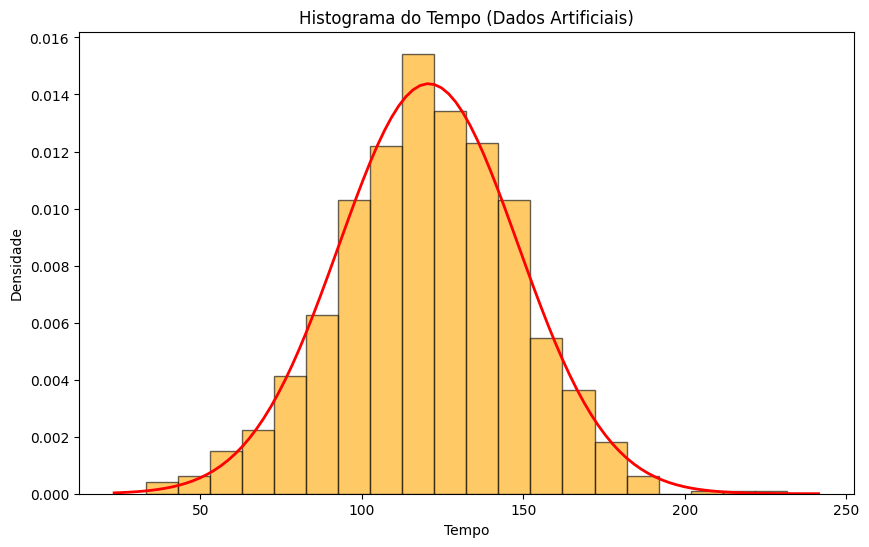

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(tempo_artificial, bins=20, density=True, alpha=0.6, color='orange', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2)
plt.title('Histograma do Tempo (Dados Artificiais)')
plt.xlabel('Tempo')
plt.ylabel('Densidade')
plt.grid(False)
plt.show()

Escolhendo uma amostra e criando uma sample distribuition

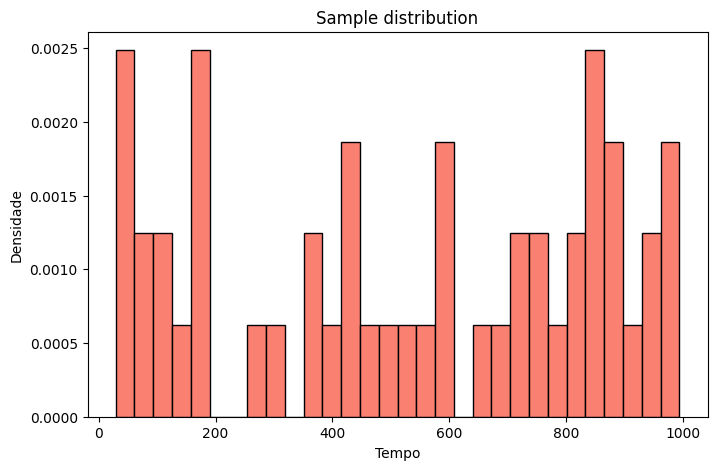

In [ ]:
## sample

tamanho_amostra = np.random.choice(populacao, size=50, replace=False)

plt.figure(figsize=(8,5))
plt.hist(tamanho_amostra, bins=30, density=True, color='salmon', edgecolor='black')
plt.title('Sample distribution')
plt.xlabel('Tempo')
plt.ylabel('Densidade')
plt.show()

Escolhendo amostras, fazendo suas médias e plotando a sampling distribuition

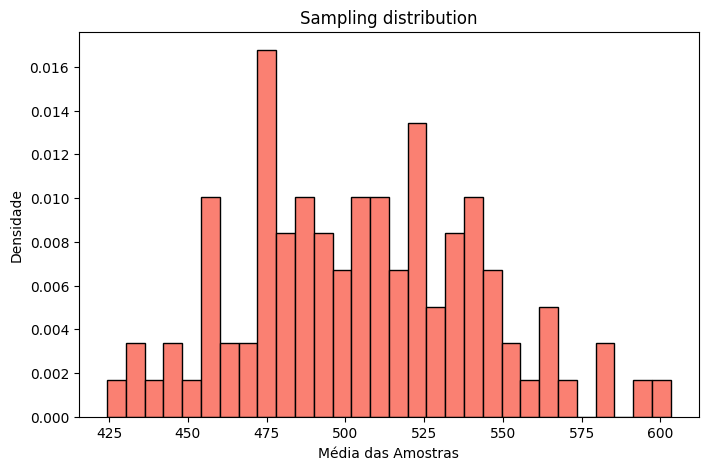

In [ ]:
## sampling

medias_amostrais = []

for i in range(100):
    amostra = np.random.choice(populacao, size=50, replace=False)
    media_amostra = np.mean(amostra)
    medias_amostrais.append(media_amostra)

plt.figure(figsize=(8,5))
plt.hist(medias_amostrais, bins=30, density=True, color='salmon', edgecolor='black')
plt.title('Sampling distribution')
plt.xlabel('Média das Amostras')
plt.ylabel('Densidade')
plt.show()

Normalizando dados da sample e sampling

In [ ]:
x = 570

# Z-score do valor x em relação a sample
media_amostra = np.mean(tamanho_amostra)
desvio_amostra = np.std(tamanho_amostra)

z_sample = (x - media_amostra) / desvio_amostra
print(z_sample)

# Z-score do valor x em relação a sampling
media_das_medias = np.mean(medias_amostrais)
desvio_das_medias = np.std(medias_amostrais)

z_sampling = (x - media_das_medias) / desvio_das_medias
print(z_sampling)

0.11800909737923054
1.708014804432065


Tabela da probabilidade do sample distribuition

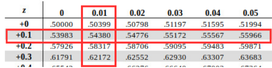

Tabela da probabilidade do sampling distribuition

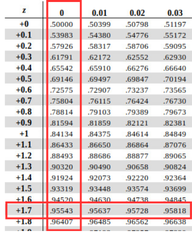

In [ ]:
# resultado

res1 = 1 - 0.54380
res2 = 1 - 0.95543

print(res1)
print(res2)

0.45620000000000005
0.04457


Então tem aproximadamente 45% de chance do valor ser 570 no sample distribuition. Porém, no sampling tem apenas 4%.



---



Parte B: TLC

Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

Gerando uma população com distribuição gamma

In [ ]:
tamanho_populacao = 1000

populacao = np.random.gamma(1, 2, tamanho_populacao)

Definindo diferentes tamanhos d eamostras

In [ ]:
tamanhos_amostras = [10, 30, 50, 100]

Plotando a distriibuição de acordo com os tamanhos das amostras

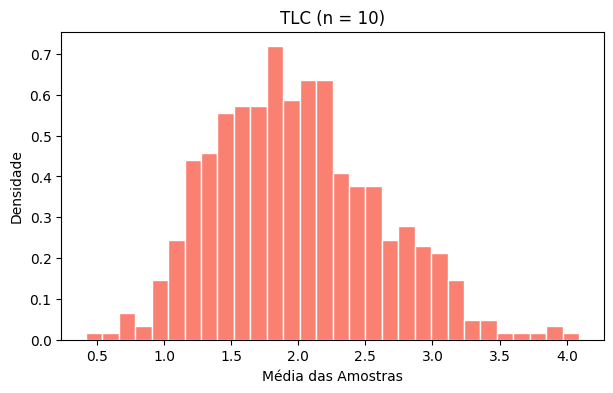

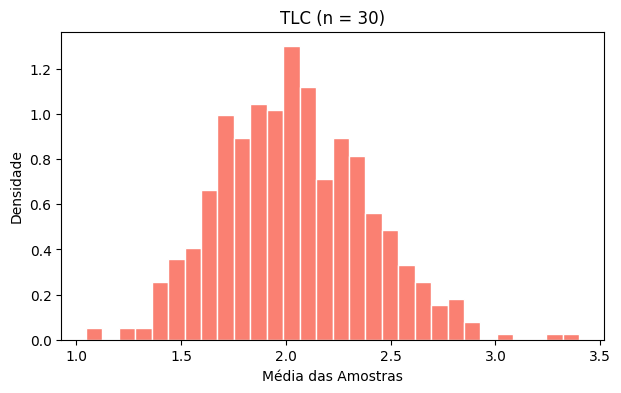

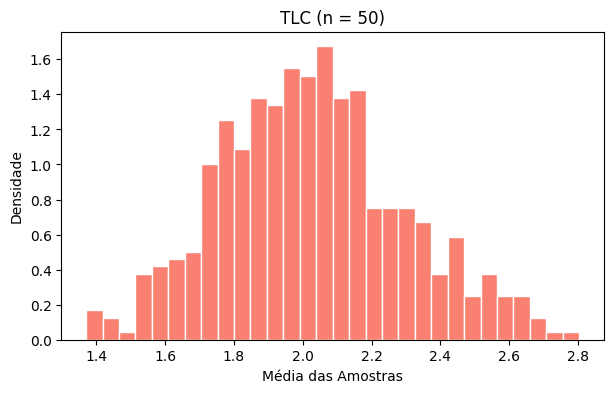

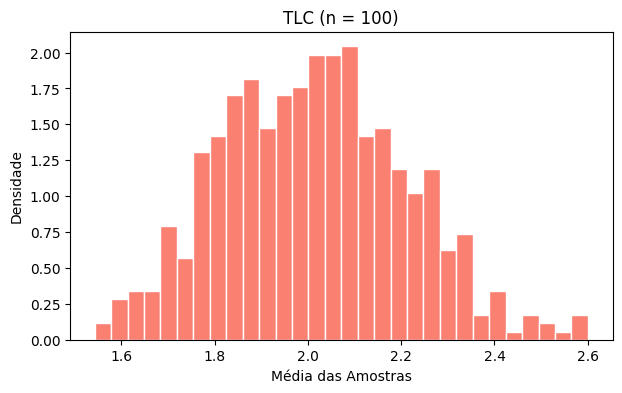

In [ ]:
for n in tamanhos_amostras:
    medias = []
    for _ in range(500):
        amostra = np.random.choice(populacao, size=n, replace=False)
        medias.append(np.mean(amostra))

    plt.figure(figsize=(7, 4))
    plt.hist(medias, bins=30, density=True, color='salmon', edgecolor='white')
    plt.title(f'TLC (n = {n})')
    plt.xlabel('Média das Amostras')
    plt.ylabel('Densidade')
    plt.show()



---



Parte C: p-value

Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.

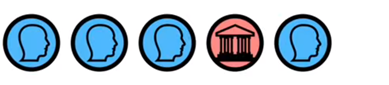

Hipotese Nula: Embora eu tenha tido 4 caras e uma coroa minha moeda é justa

Hipotese alternativa: minha moeda não é justa

- Primeiro passo: saber quantas são as possibilidades.

In [ ]:
evento = 5
prob = 2

# a prob elevada pelo evento
possibilidades = prob**evento
print(possibilidades)

32


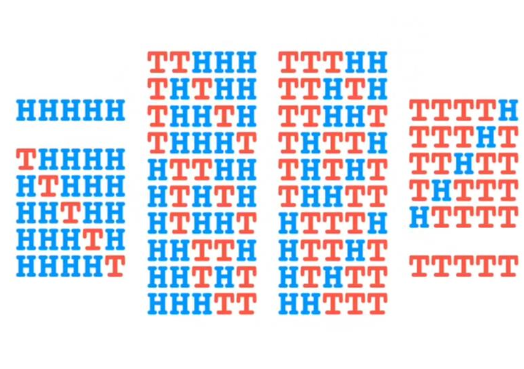

- Segundo passo: identificar quantos desses resultados são favoráveis

In [ ]:
from math import comb

In [ ]:
# a probabilidade de cair 1 coroa e 4 caras

favoraveis_4caras_1coroa = comb(5, 1)
print(favoraveis_4caras_1coroa)

5


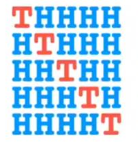

- Terceiro passo: como o teste do p-value é mais comum ser bilateral, é necessário fazer a probabilidade avaliando as duas extremidades. Nesse caso, é necessário identificados os resultados que são equivalentemente ao primeiro resultado.

In [ ]:
# a probabilidade de cair 4 coroas e 1 cara

favoraveis_4coroas_1cara = comb(5, 1)
print(favoraveis_4coroas_1cara)

5


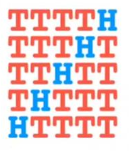

- Quarto passo: adicionar na probabilidade, alcançar o resultado mais raro, que no caso seria obter 5 caras e 5 coroas.

In [ ]:
favoraveis_5caras = 1
favoraveis_5coroas = 1

# somando os eventos extremos
print(favoraveis_5caras + favoraveis_5coroas)

2


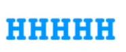

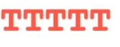

- Quinto passo: calcular a probabilidade final

In [ ]:
probabilidade_total = (favoraveis_4caras_1coroa + favoraveis_4coroas_1cara + favoraveis_5caras + favoraveis_5coroas) / possibilidades
print(f"p-value aproximado: {probabilidade_total:.4f}")

p-value aproximado: 0.3750


O que significa que a moeda aparentemente é justa, porque o p-value não foi abaixo de 0.05 e a hipotese nula é verdadeira.



---



Parte D: p-value



Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).

1. Gerar duas Gaussianas.

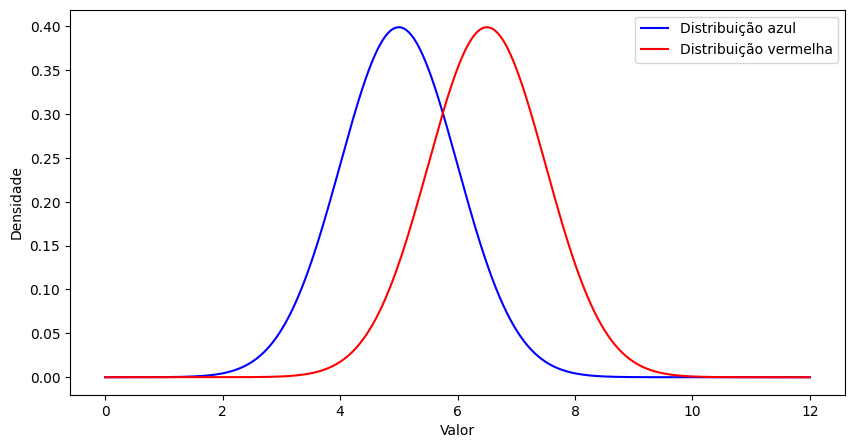

In [53]:
sigma = 1
media_azul = 5
media_vermelha = 6.5
n_amostras = 100
tamanho_sequencia = 3

x = np.linspace(0, 12, 1000)
y_azul = norm.pdf(x, loc=media_azul, scale=sigma)
y_vermelha = norm.pdf(x, loc=media_vermelha, scale=sigma)

plt.figure(figsize=(10,5))
plt.plot(x, y_azul, label='Distribuição azul', color='blue')
plt.plot(x, y_vermelha, label='Distribuição vermelha', color='red')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.show()


2. Sorteio das sequências de 3 valores da azul


In [54]:
np.random.seed(50)
sequencias = np.random.normal(loc=media_azul, scale=sigma, size=(n_amostras, tamanho_sequencia))

#print(sequencias)

3. Calcular p-values com base na curva vermelha

In [55]:
medias_sequencias = np.mean(sequencias, axis=1)

z_scores = (medias_sequencias - media_vermelha) / (sigma / np.sqrt(tamanho_sequencia))
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

np.set_printoptions(precision=4, suppress=True)
print(p_values)

[0.0001 0.0037 0.0015 0.0052 0.003  0.4187 0.0201 0.0045 0.0119 0.1942
 0.0473 0.0945 0.0189 0.0387 0.0001 0.0067 0.0009 0.0549 0.0769 0.0123
 0.036  0.0082 0.0013 0.0131 0.2915 0.2654 0.0193 0.     0.0111 0.
 0.012  0.1241 0.0091 0.0025 0.0026 0.008  0.     0.0032 0.0029 0.
 0.0904 0.1156 0.0001 0.0002 0.0402 0.0305 0.1501 0.0004 0.1448 0.0017
 0.0006 0.006  0.026  0.0023 0.     0.0263 0.0008 0.     0.0523 0.
 0.0039 0.0019 0.156  0.0105 0.0013 0.1798 0.0013 0.032  0.0309 0.0103
 0.0001 0.003  0.1992 0.0019 0.9575 0.0138 0.0004 0.2627 0.0258 0.0003
 0.0003 0.0244 0.0021 0.     0.0656 0.0026 0.0009 0.0029 0.0396 0.6347
 0.0064 0.0359 0.2293 0.0001 0.0377 0.0031 0.0064 0.0001 0.0002 0.0043]


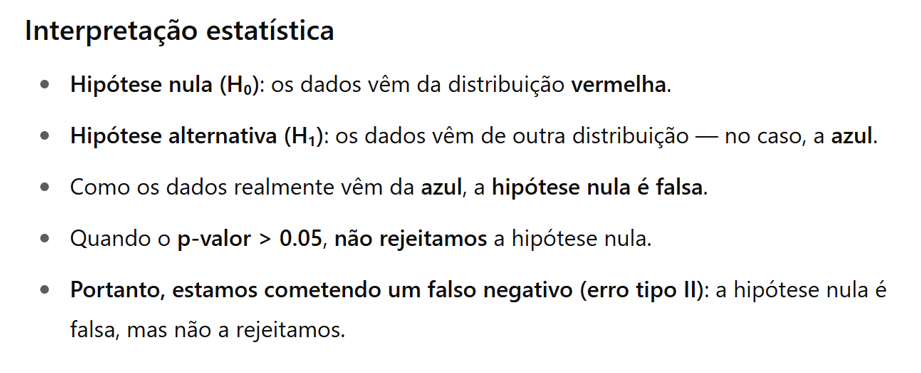

4. Calcular a taxa de falso negativos (p-value > 0.05)

In [56]:
falsos_negativos = np.sum(p_values > 0.05)
taxa_fn = falsos_negativos / n_amostras

print(taxa_fn)

0.21


A taxa de ser um falso negativo é 21% porque o p-value está sendo superior a 0.05.